 # Weather Prediction

 I'll be using Kaggle's Austin Weather dataset. We will only predict the temperature, despite the fact that the dataset contains historical temperature, precipitation, humidity, and windspeed for Austin, Texas.

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('austin_weather.csv')
df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


In [4]:
df.Date.unique()

array(['2013-12-21', '2013-12-22', '2013-12-23', ..., '2017-07-29',
       '2017-07-30', '2017-07-31'], dtype=object)

In [5]:
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [6]:
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [7]:
df ['Date'] = pd.to_datetime(df ['Date'])
df.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


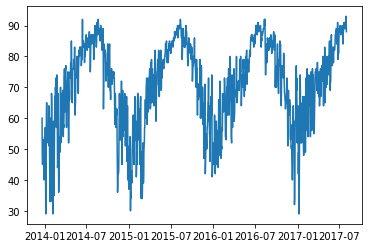

In [8]:
plt.plot(df ['Date'], df ['TempAvgF'])
plt.show()

In [9]:
new_column = df[['Date', 'TempAvgF']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93
1318,2017-07-31,88


In [12]:
n = NeuralProphet()
model = n.fit(new_column, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 178


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.36E-01, min: 7.62E-02


  0%|          | 0/128 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.97E-02, min: 8.97E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.36E-01
Epoch[178/178]: 100%|██████████| 178/178 [00:17<00:00, 10.19it/s, SmoothL1Loss=0.00615, MAE=4.95, RMSE=6.57, RegLoss=0]


In [13]:
future = n.make_future_dataframe(new_column, periods=1500)
forecast = n.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.924% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1495,2021-09-04,None,81.204269,NaN,69.625488,12.036603,-0.457818
1496,2021-09-05,None,81.065552,NaN,69.623123,11.827039,-0.384610
1497,2021-09-06,None,81.426437,NaN,69.620758,11.618937,0.186744
1498,2021-09-07,None,81.420723,NaN,69.618393,11.412911,0.389418
1499,2021-09-08,None,81.057251,NaN,69.616028,11.209514,0.231708


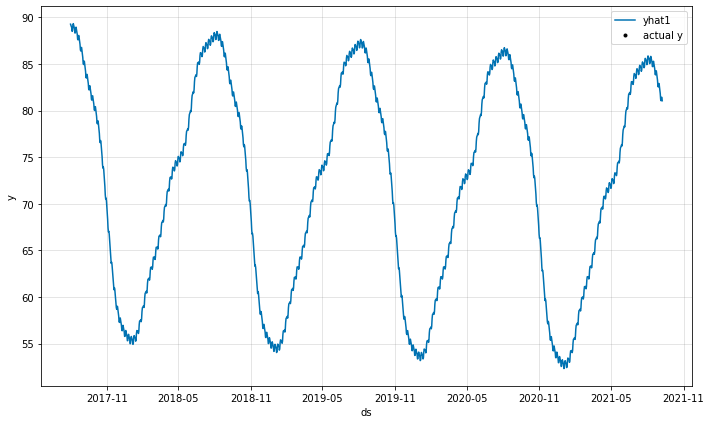

In [14]:
plot = n.plot(forecast)